In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
% cd "/content/drive/Shared drives/Artists!/data/"
! ls


/content/drive/Shared drives/Artists!/data
fma_medium  fma_medium.zip  fma_metadata


In [0]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
def get_melspectrogram(path):
  """

  path: the path to a audio file(.mp3)
  return: spect: a matrix that represents soectrogram
  """
  y, sr = librosa.load(path)
  spect = librosa.feature.melspectrogram(y=y, sr=sr,n_fft=2048, hop_length=512)
  spect = librosa.power_to_db(spect, ref=np.max)
  return spect

def plot_spectrogram(spect):
  """
  
  plot the spectrogram
  """
  plt.figure(figsize=(10, 4))
  librosa.display.specshow(spect.T, y_axis='mel', fmax=8000, x_axis='time')
  plt.colorbar(format='%+2.0f dB')
  plt.show()
  

In [0]:
import pandas as pd
def csv_file(path):
  data = pd.read_csv(path)
  # print(data.head(5))
  print(data)
  return data
  
df_genres = csv_file("./fma_metadata/genres.csv")



     genre_id  #tracks  parent          title  top_level
0           1     8693      38    Avant-Garde         38
1           2     5271       0  International          2
2           3     1752       0          Blues          3
3           4     4126       0           Jazz          4
4           5     4106       0      Classical          5
..        ...      ...     ...            ...        ...
158      1032       60     102        Turkish          2
159      1060       30      46          Tango          2
160      1156       26     130           Fado          2
161      1193       72     763      Christmas         38
162      1235    14938       0   Instrumental       1235

[163 rows x 5 columns]


In [0]:
dic_genres_grandpa = {}
for index, row in df_genres.iterrows():
    dic_genres_grandpa[row.top_level] = 0
for index, row in df_genres.iterrows():
    dic_genres_grandpa[row.top_level] += float(row['#tracks'])

print('16 top levels of genres')
for key,value in dic_genres_grandpa.items():
  print(key,value)


16 top levels of genres
38 82674.0
2 10581.0
3 1818.0
4 6256.0
5 6839.0
20 4037.0
8 868.0
9 3370.0
10 22824.0
14 2640.0
12 80567.0
13 1337.0
15 63220.0
17 21338.0
1235 28755.0
21 12036.0


In [0]:
dic_genres_pa = {}
for index, row in df_genres.iterrows():
  if int(row.parent) == 0:
    try:
        dic_genres_pa[row.top_level] += float(row['#tracks'])
    except:
        dic_genres_pa[row.top_level] = float(row['#tracks'])
  else:
    try:
        dic_genres_pa[row.parent] += float(row['#tracks'])

    except:
        dic_genres_pa[row.parent] = float(row['#tracks'])


df_parent = pd.DataFrame(list(dic_genres_pa.items()),columns=['genre_id','count'])
df_parent = df_parent.sort_values(by=['count'],ascending=False).reset_index(drop=True)
# print('40 of parent genres')
# for key,value in dic_genres_pa.items():
#   print(key,value)
print(df_parent)


    genre_id    count
0         38  81829.0
1         12  71216.0
2         15  60899.0
3       1235  28417.0
4         10  22824.0
5         17  21338.0
6         21  12036.0
7          2   9837.0
8          5   6839.0
9          4   6256.0
10        25   5443.0
11        20   3679.0
12         9   3366.0
13        14   2639.0
14        45   2071.0
15         3   1818.0
16        13   1337.0
17       297   1231.0
18         8    868.0
19       182    823.0
20        31    662.0
21         6    505.0
22        26    484.0
23        65    358.0
24        18    338.0
25       130    310.0
26        16    268.0
27        85    265.0
28        53    251.0
29       181    189.0
30       109    175.0
31        92    150.0
32        46    109.0
33        79     94.0
34       468     78.0
35       763     72.0
36       102     60.0
37        86     21.0
38       651      4.0
39        19      1.0


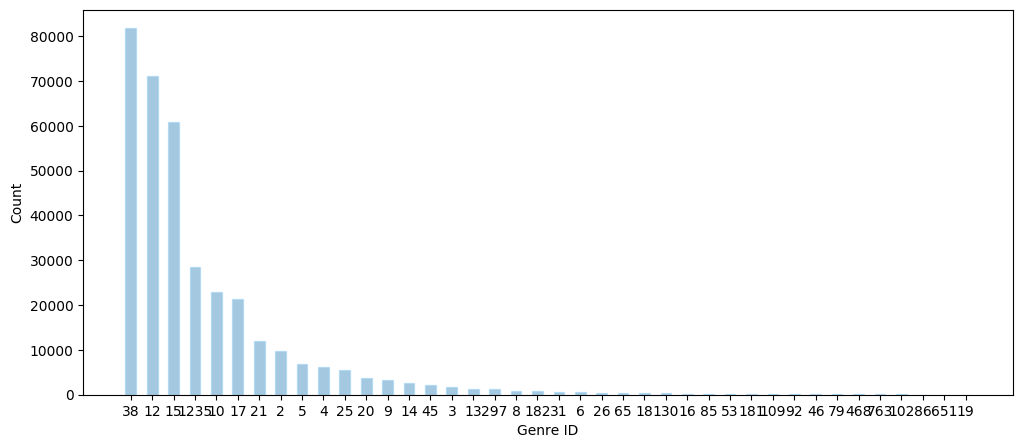

In [0]:
# plot all genres counts
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
counts = np.array(df_parent['count']).tolist()
objects = np.array(df_parent['genre_id']).tolist()
y_pos = np.arange(len(objects))
plt.figure(figsize=(12, 5))
plt.bar(y_pos, counts, align='center', alpha=0.4, width=0.5, edgecolor='lightskyblue',lw=1)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.xlabel('Genre ID')
plt.show()

In [0]:
set(df_genres['parent'])
list_grandpa = list(set(df_genres['top_level']))
print(list_grandpa)
print(len(list_grandpa))
list_pa = list(set(df_genres['parent']))
print(len(list_pa))
list_pa.remove(0)
print(list_pa)

df_grandpa = df_genres[df_genres['parent']==0]
print(df_grandpa[['genre_id','title']])
      

[2, 3, 4, 5, 38, 8, 9, 10, 12, 13, 14, 15, 17, 1235, 20, 21]
16
40
[2, 130, 4, 5, 6, 3, 9, 10, 651, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 25, 26, 31, 38, 297, 45, 46, 53, 182, 181, 65, 79, 1235, 468, 85, 86, 92, 102, 109, 763]
     genre_id                title
1           2        International
2           3                Blues
3           4                 Jazz
4           5            Classical
7           8  Old-Time / Historic
8           9              Country
9          10                  Pop
11         12                 Rock
12         13       Easy Listening
13         14             Soul-RnB
14         15           Electronic
16         17                 Folk
19         20               Spoken
20         21              Hip-Hop
31         38         Experimental
162      1235         Instrumental


In [0]:
filepath = './fma_metadata/tracks.csv'
tracks = pd.read_csv(filepath, index_col=0, header=[0, 1])
tracks.head(2)

album                       ... track              
         comments         date_created  ...  tags         title
track_id                                ...                    
2               0  2008-11-26 01:44:45  ...    []          Food
3               0  2008-11-26 01:44:45  ...    []  Electric Ave

[2 rows x 52 columns]

In [0]:
tracks = tracks[(tracks['set']['subset']=='medium')|(tracks['set']['subset']=='small')]


In [0]:
df_tracks = pd.concat((pd.Series(tracks.index,dtype="str"),tracks['track']['genres_all'].reset_index(drop=True)),axis =1)
df_tracks.columns = ["tracks_id","genres_all"]
df_tracks["genres_all"] = df_tracks["genres_all"].map(lambda x: list(set(eval(x))&set(list_pa)) if len(list(set(eval(x))&set(list_pa)))!=0 else "None")
df_tracks = df_tracks[df_tracks["genres_all"]!="None"]
df_tracks["genres_all"] = df_tracks["genres_all"].map(lambda x:x[0])




In [0]:
df_tracks

,tracks_id,genres_all
0,2,21
1,3,21
2,5,21
3,10,10
4,134,21
...,...,...
24995,155297,18
24996,155298,17
24997,155306,17
24998,155307,38


In [0]:
df_groupby = df_tracks.groupby(['genres_all']).count()
df_groupby


,tracks_id
genres_all,
2,941
3,74
4,384
5,619
9,178
10,1186
12,3157
13,21
14,85


In [0]:
import random
random.seed(0) 
genre_dic = {}
genre_list = []
for i in df_groupby.index:
  temp = df_tracks[df_tracks["genres_all"]==i].reset_index(drop=True)
  if len(temp)>500:
      index_list = random.sample(temp["tracks_id"].to_list(),500)
      genre_dic[i] = index_list
      genre_list+=genre_dic[i]
  elif len(temp)>=200 and len(temp)<=500:
      genre_dic[i] = temp["tracks_id"].to_list()
      genre_list+=genre_dic[i]
  else:
      pass

new_arr = np.array(df_tracks)
_List = []
for i in range(len(new_arr)):
    if new_arr[i][0] in genre_list:
        _List.append(new_arr[i])

print(_List)
df_result = pd.DataFrame(_List, columns=["tracks_count","genres_all"])
df_result.head()
# df_result.to_csv("../data_modified/result_pa.csv")


[array(['2', 21], dtype=object), array(['3', 21], dtype=object), array(['5', 21], dtype=object), array(['139', 17], dtype=object), array(['141', 17], dtype=object), array(['182', 12], dtype=object), array(['194', 17], dtype=object), array(['209', 17], dtype=object), array(['210', 17], dtype=object), array(['212', 17], dtype=object), array(['213', 10], dtype=object), array(['237', 4], dtype=object), array(['398', 15], dtype=object), array(['399', 15], dtype=object), array(['424', 38], dtype=object), array(['459', 12], dtype=object), array(['535', 17], dtype=object), array(['540', 17], dtype=object), array(['550', 15], dtype=object), array(['573', 25], dtype=object), array(['574', 25], dtype=object), array(['584', 21], dtype=object), array(['585', 21], dtype=object), array(['590', 4], dtype=object), array(['591', 4], dtype=object), array(['592', 4], dtype=object), array(['593', 4], dtype=object), array(['602', 17], dtype=object), array(['621', 17], dtype=object), array(['625', 17], dtype

,tracks_count,genres_all
0,2,21
1,3,21
2,5,21
3,139,17
4,141,17


In [0]:
print(len(df_result))
df_groupby_re = df_result.groupby(['genres_all']).count()
endlist = list(set(df_result['genres_all']))
print(endlist)
df_title = df_genres[df_genres['genre_id'].isin(endlist)]
df_title = list(df_title['title'])
print(list(df_title))
df_groupby_re.insert(0,'title',df_title)
print(df_groupby_re)
# print(len(df_groupby_re))

8252
[2, 4, 5, 38, 297, 10, 12, 15, 17, 18, 1235, 468, 21, 181, 182, 25, 26]
['International', 'Jazz', 'Classical', 'Pop', 'Rock', 'Electronic', 'Folk', 'Soundtrack', 'Hip-Hop', 'Punk', 'Post-Rock', 'Experimental', 'Techno', 'House', 'Chip Music', 'Dubstep', 'Instrumental']
                    title  tracks_count
genres_all                             
2           International           500
4                    Jazz           384
5               Classical           500
10                    Pop           500
12                   Rock           500
15             Electronic           500
17                   Folk           500
18             Soundtrack           500
21                Hip-Hop           500
25                   Punk           500
26              Post-Rock           438
38           Experimental           500
181                Techno           500
182                 House           443
297            Chip Music           500
468               Dubstep           487
1235 